# Analysis 3

#### Find the top 30 best forwards/midfielders/defenders/goal keepers of premier league according to:
##### goals_scored, assists,  yellow_card, red_card, penalties_missed, penalties_saved, saves, own_goals, goals_conceded, clean_sheets
#### Each +goal, +assist, +penalties saved, +saves, +clean sheets will give positive score where as each -yellow card, -red card, -penalties missed, -own goal, -goal conceded will give negative score
#### Calculate score and appearances for each player and find the rating for each player
#### This analysis gives insight of which is the best performing and best behaved player of premier league

###### player, goals +3, assists +1, penalties saved +3, saves +0.5, clean sheets +0.5, yellow -0.5, red -1, penalties missed -3, own goal -3, goal conceded -1, minutes played, score, performance = score/minutes played

In [1]:
#Import statements
import json, os, glob, matplotlib as mpl, matplotlib.pyplot as plt, seaborn as sns, pandas as pd, numpy as np, itertools
import matplotlib.patches as mpatches
from datetime import datetime
from pandas import DataFrame

In [2]:
#Get data directory as a relative path for all 3 required fetched responses
current_dir = os.path.dirname('__file__')
data_dir = os.path.join(current_dir, '..', 'data','fpl','*.json')

In [3]:
# The lists to hold data for each player 
players = []
team_id = {}
goals = []
role_id = {}
roles = []
assists = []
penalties_saved = []
saves = []
clean_sheets = []
yellow_cards = []
red_cards = []
penalties_missed = []
own_goals = []
goals_conceded = []
minutes_played = []
teams = []

for filename in glob.glob(data_dir):
    with open(filename) as fil:
        current_file= json.load(fil)
        
        #Getting player names
        players = [player['first_name']+" "+player['second_name'] for player in current_file['elements']]
        
        #Getting player teams
        # Getting all team ids and create a dict
        for team in current_file['teams']:
            team_id[team['id']] = team['name']
        #Get list of team id for each player
        ids = [player['team'] for player in current_file['elements']]
        # For each id, get the team name
        for teamid in ids:
            teams.append(team_id.get(teamid))
        
        #Getting player role
        # Getting all team ids and create a dict
        for role in current_file['element_types']:
            role_id[role['id']] = role['singular_name']
        #Get list of team id for each player
        ids = [player['element_type'] for player in current_file['elements']]
        # For each id, get the team name
        for roleid in ids:
            roles.append(role_id.get(roleid))
            
        
        #Getting player goals
        goals  = [player['goals_scored'] for player in current_file['elements']]
        
        #Getting player assists
        assists  = [player['assists'] for player in current_file['elements']]

        #Getting penalties saved
        penalties_saved  = [player['penalties_saved'] for player in current_file['elements']]
        
        #Getting player saves
        saves = [player['saves'] for player in current_file['elements']]
        
        #Getting player clean sheets
        clean_sheets = [player['clean_sheets'] for player in current_file['elements']]
        
        #Getting player yellow cards
        yellow_cards = [player['yellow_cards'] for player in current_file['elements']]
        
        #Getting player red cards
        red_cards = [player['red_cards'] for player in current_file['elements']]
        
        #Getting player penalties missed
        penalties_missed = [player['penalties_missed'] for player in current_file['elements']]
        
        #Getting player own goals
        own_goals = [player['own_goals'] for player in current_file['elements']]
        
        #Getting player goals conceded
        goals_conceded = [player['goals_conceded'] for player in current_file['elements']]
        
        #Getting player minutes played
        minutes_played = [player['minutes'] for player in current_file['elements']]
        

In [4]:
df = DataFrame({'player' :players,'team': teams,'role':roles, 'goals': goals, 'assists' :assists, 'penalties saved':penalties_saved, 'saves':saves, 'clean sheets': clean_sheets, 'yellow cards' :yellow_cards, 'red cards' :red_cards, 'penalties missed': penalties_missed, 'own goals':own_goals, 'goals conceded':goals_conceded,'minutes':minutes_played })
df = df[['player','team','role', 'goals','assists','penalties saved','saves','clean sheets','yellow cards','red cards','penalties missed','own goals','goals conceded','minutes']]

df['score']= df['goals']*3+df['assists']+df['penalties saved']*3+round(df['saves']/2,2)+round(df['clean sheets']/2,2)-round(df['yellow cards']/2,2)-df['red cards']-df['penalties missed']*3-df['own goals']*3-df['goals conceded']
# performance = score/minutes played
df['rating'] = round(1.5*60*df['score']/df['minutes'],2)
df.fillna(0.00, inplace=True)

In [5]:
df = df.sort_values(by=['rating','goals','assists','saves'],ascending=False) #
df.head()

,player,team,role,goals,assists,penalties saved,saves,clean sheets,yellow cards,red cards,penalties missed,own goals,goals conceded,minutes,score,rating
624,Gabriel Fernando de Jesus,Man City,Forward,3,1,0,0,1,1,0,0,0,1,203,9.0,3.99
95,Michy Batshuayi,Chelsea,Forward,1,1,0,0,0,0,0,0,0,0,127,4.0,2.83
242,Sergio Romero,Man Utd,Goalkeeper,0,0,0,4,1,0,0,0,0,0,90,2.5,2.50
402,Harry Kane,Spurs,Forward,20,5,0,0,12,1,0,1,0,15,1995,52.5,2.37
24,Olivier Giroud,Arsenal,Forward,9,4,0,0,3,1,0,0,0,13,925,19.0,1.85


In [6]:
#Function to create output data folder
def create_directory_for_output():
    current_dir = os.path.dirname('__file__')
    data_folder = os.path.join(current_dir, 'ana_3')
    if not os.path.exists(data_folder):
        os.mkdir(data_folder)
    return data_folder

output_folder=create_directory_for_output()

#csv file name and path
file_name = 'best_players'
file_path = os.path.join(output_folder, file_name)
file_path+='.csv'

#Save file to created output file
df.to_csv(file_path,index = False)

In [7]:
# Get top 30 best players
df_top_30 = df.head(30)

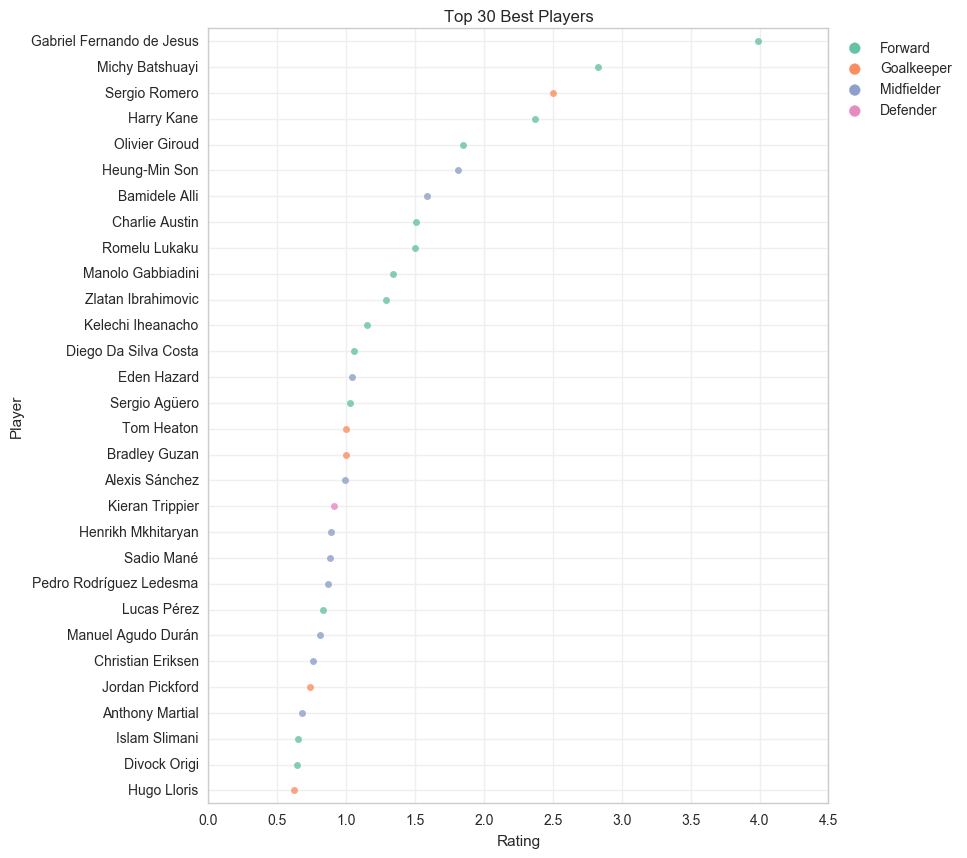

In [8]:
# Plot the box plot for team versus yellow cards
sns.set_style("whitegrid")
fig = plt.figure(figsize=(8,10))

ax = sns.swarmplot(x="rating", y="player", data=df_top_30, hue="role", alpha=.8, palette='Set2')

# Beautify plot
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Top 30 Best Players')
ax.set(xlabel='Rating', ylabel='Player')

# To Show Gridlines 
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='#efefef', linewidth=1.0)

plt.show()

# File name
pallet_name = 'best_players'
pallet_path = os.path.join(output_folder, pallet_name)
pallet_path+='.png'

#Save the plot
ax.figure.savefig(pallet_path, bbox_inches='tight')   # save the figure to file